
## The CIFAR-100 dataset



In [1]:
import tensorflow as tf
from keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt
import cv2
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

### Importing data and labels

In [2]:
(training_images, training_labels), (testing_images, testing_labels) = cifar100.load_data()

In [24]:
import pandas as pd
labels = pd.read_csv(r"C:\Users\akshada\Downloads\cifar100_labels.csv", header=None, index_col=0)

In [25]:
labels.head()

,1
0,
0,apple
1,aquarium_fish
2,baby
3,bear
4,beaver


In [3]:
print("Shape of training images:", training_images.shape)
print("Shape of testing images:", testing_images.shape)
print("Shape of training labels:", training_labels.shape)

Shape of training images: (50000, 32, 32, 3)
Shape of testing images: (10000, 32, 32, 3)
Shape of training labels: (50000, 1)


In [4]:
print(np.unique(training_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [5]:
training_images.shape

(50000, 32, 32, 3)

### Visualizing training images

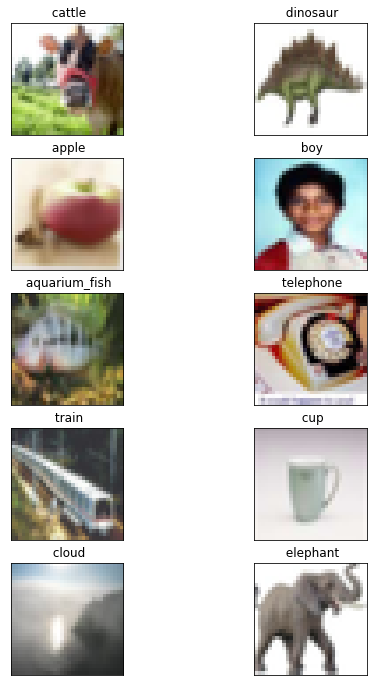

In [29]:
plt.figure(figsize=(8, 12))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(training_images[i])
    plt.title(labels[1][training_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
#  print(training_labels[i])
plt.show()

### Normalizing images

In [7]:
training_images = training_images/255.
testing_images = testing_images/255.

### Building CNN Model

In [9]:
model = tf.keras.Sequential([
                            tf.keras.layers.InputLayer(input_shape=(32,32,3)),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', strides=1, padding='same'),
                            tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'),
                            tf.keras.layers.Flatten(),
                            tf.keras.layers.Dense(512, activation = 'relu'),
                            tf.keras.layers.Dense(256, activation = 'relu'),

                            tf.keras.layers.Dense(len(np.unique(training_labels)), activation = 'softmax')
                             
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ["accuracy"])

In [12]:
early_stop = EarlyStopping(monitor="val_loss", verbose=1, patience=3)

In [13]:
history = model.fit(training_images, training_labels, epochs=50, callbacks=[early_stop],
                    validation_data=(testing_images, testing_labels))

Epoch 1/50
1563/1563 [==============================] - 52s 33ms/step - loss: 3.7045 - accuracy: 0.1291 - val_loss: 3.2323 - val_accuracy: 0.2174
Epoch 2/50
1563/1563 [==============================] - 54s 35ms/step - loss: 3.0053 - accuracy: 0.2530 - val_loss: 2.9311 - val_accuracy: 0.2740
Epoch 3/50
1563/1563 [==============================] - 51s 33ms/step - loss: 2.6824 - accuracy: 0.3168 - val_loss: 2.7226 - val_accuracy: 0.3126
Epoch 4/50
1563/1563 [==============================] - 53s 34ms/step - loss: 2.4314 - accuracy: 0.3702 - val_loss: 2.5919 - val_accuracy: 0.3396-  - ETA: 1s - loss: 2.4325 - accu
Epoch 5/50
1563/1563 [==============================] - 51s 33ms/step - loss: 2.2131 - accuracy: 0.4169 - val_loss: 2.5306 - val_accuracy: 0.3646
Epoch 6/50
1563/1563 [==============================] - 50s 32ms/step - loss: 2.0319 - accuracy: 0.4542 - val_loss: 2.5816 - val_accuracy: 0.3615s - - ET - ETA: 38s - loss: 1.9848 - acc - ETA: 24s - loss: 2.0063 - accuracy: - ETA: 24s -

In [18]:
#model.save("dl_cifar100_model.h5")

### Model performance 

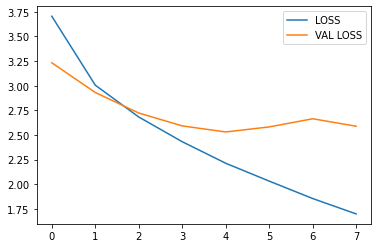

In [14]:
plt.plot(history.history['loss'], label="LOSS")
plt.plot(history.history['val_loss'], label="VAL LOSS")
plt.legend(loc='best')
plt.show()

In [15]:
prob = model.predict(testing_images)
pred = np.argmax(prob, axis=1)

In [16]:
print(accuracy_score(testing_labels, pred))

0.377


In [17]:
testing_labels=testing_labels.astype('float')
print(log_loss(testing_labels, prob))

2.5886882424363318


In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(testing_labels, pred)

array([[62,  2,  0, ...,  0,  0,  0],
       [ 0, 58,  0, ...,  1,  0,  1],
       [ 0,  3, 24, ...,  1,  3,  1],
       ...,
       [ 0,  0,  0, ..., 41,  0,  1],
       [ 0,  1,  5, ...,  0,  8,  1],
       [ 0,  0,  0, ...,  1,  0, 28]], dtype=int64)

In [43]:
testing_labels = testing_labels.astype('int')

### Visualizing predictions 

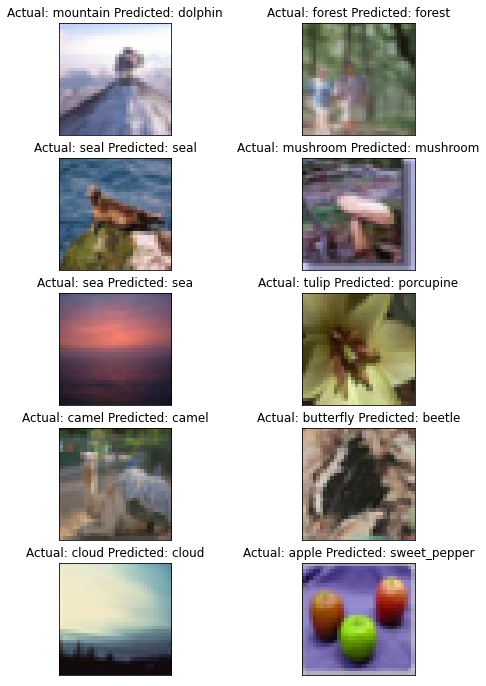

In [59]:
plt.figure(figsize=(8, 12))

for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(testing_images[i])
    string = "Actual:"+ labels[1][testing_labels[i][0]] + " Predicted:" + labels[1][pred[i]] 
    plt.title(string)
    plt.xticks([])
    plt.yticks([])
plt.show()